# 逻辑回归原理介绍

逻辑回归处理的是**分类问题**，线性回归处理的是回归问题，这是两者最本质的区别。逻辑回归对y值的预测可以看做类别1的概率预测值，使用的是Logistic函数（或称为sigmoid函数），函数的形式为：
$$logi(z) = \frac{1}{1+e^{-z}}$$
对应的函数图像如下

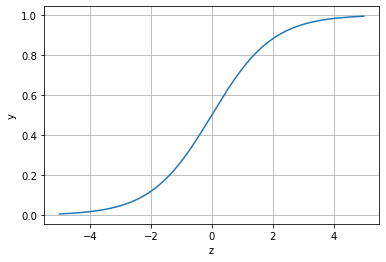

In [35]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-5,5,0.01)
y = 1/(1+np.exp(-x))

plt.plot(x,y)
plt.xlabel('z')
plt.ylabel('y')
plt.grid()
plt.show()

通过上图我们可以发现Logistic函数是单调递增函数，并且在z=0时y=0.5

回归的基本方程是：
$$y = w_0 + \sum_{i=1}^N w_ix_i$$
将回归方程写入其中为：
$$p = p(y=1|x,\theta) = h_\theta(x,\theta) = \frac{1}{1+e^{-(w_0 + \sum_{i=1}^N w_ix_i)}}$$

所以，$p(y=1|x,\theta) = h_\theta(x,\theta),p(y=0|x,\theta) = 1-h_\theta(x,\theta)$

逻辑回归从原理上来说，其实是实现了一个决策边界：对于函数$y=\frac{1}{1+e^{-z}}$，当$z\ge0$时，$y\ge0.5$，分类为1，当$z<0$时，$y<0.5$，分类为0，其对应的y值我们可以视为类别为1的概率预测值。

对于模型的训练而言：实质上来说就是利用数据求解出对应模型的特定的$\omega$。从而得到一个针对于当前数据的特征逻辑回归模型。

而对于多分类而言，就是将多个二分类的逻辑回归组合，即可实现多分类。

# 基于鸢尾花（iris）数据集的逻辑回归分类实践

### Step1:函数库导入

In [1]:
##  基础函数库
import numpy as np 
import pandas as pd

## 绘图函数库
import matplotlib.pyplot as plt
import seaborn as sns

本次我们选择鸢花数据（iris）进行方法的尝试训练，该数据集一共包含5个变量，其中4个特征变量，1个目标分类变量。共有150个样本，目标变量为 花的类别 其都属于鸢尾属下的三个亚属，分别是山鸢尾 (Iris-setosa)，变色鸢尾(Iris-versicolor)和维吉尼亚鸢尾(Iris-virginica)。包含的三种鸢尾花的四个特征，分别是花萼长度(cm)、花萼宽度(cm)、花瓣长度(cm)、花瓣宽度(cm)，这些形态特征在过去被用来识别物种。


### Step2:数据读取/载入

In [2]:
##我们利用sklearn中自带的iris数据作为数据载入，并利用Pandas转化为DataFrame格式
from sklearn.datasets import load_iris
data = load_iris() #得到数据特征
iris_target = data.target #得到数据对应的标签
iris_features = pd.DataFrame(data=data.data, columns=data.feature_names) #利用Pandas转化为DataFrame格式
# print(data.DESCR) #查看数据的相关介绍

### Step3:查看数据

In [3]:
iris_features.info() # 查看数据的总特概况
iris_features.head() #查看数据前5行，默认时前5行
iris_features.describe() # 查看具体数据的相关信息，比如数量，均值，方差，中位数等
iris_target # 产看数据标签
pd.Series(iris_target).value_counts() #查看数据标签以及对应的数量

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


2    50
1    50
0    50
dtype: int64

### Step4:可视化处理

In [4]:
## 合并标签和特征信息
iris_all = iris_features.copy() ##进行浅拷贝，防止对于原始数据的修改
iris_all['target'] = iris_target

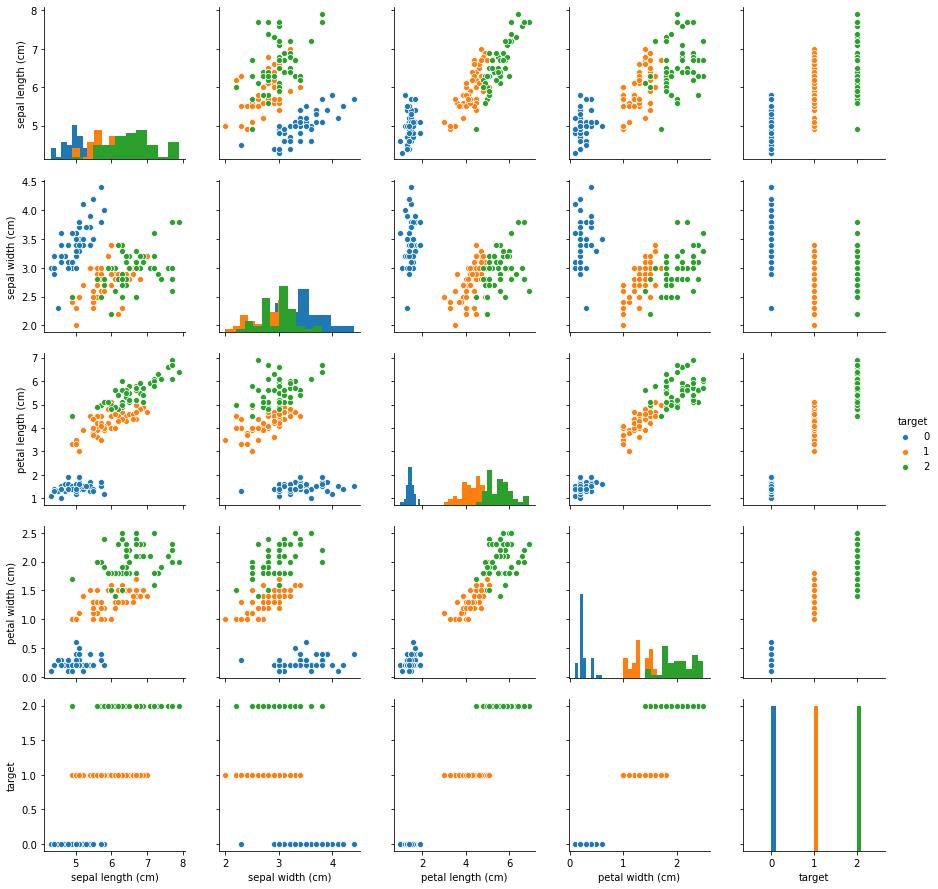

In [5]:
## 特征与标签组合的散点可视化
sns.pairplot(data=iris_all, diag_kind='hist',hue='target') #hue 会根据指定的一列的不同元素设置不同的颜色
plt.show()

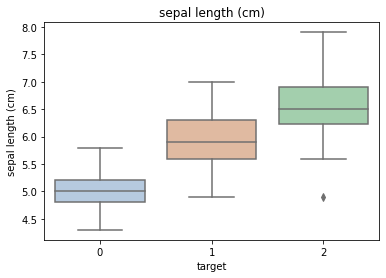

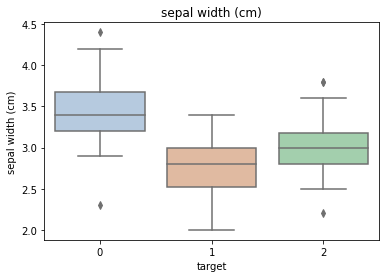

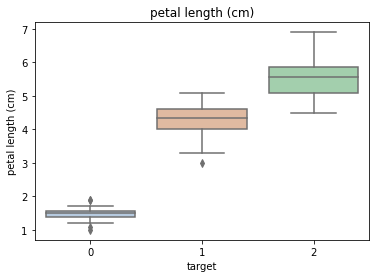

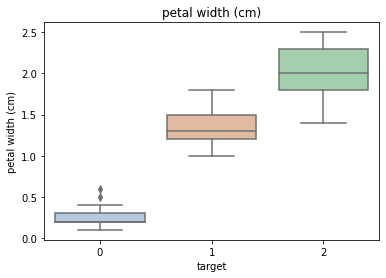

In [6]:
# 从上图可以发现，在2D情况下不同的特征组合对于不同类别的花的散点分布，以及大概的区分能力
for col in iris_features.columns:
    sns.boxplot(x='target', y=col, saturation=0.5, palette='pastel',data=iris_all)#画箱线图
    plt.title(col)
    plt.show()

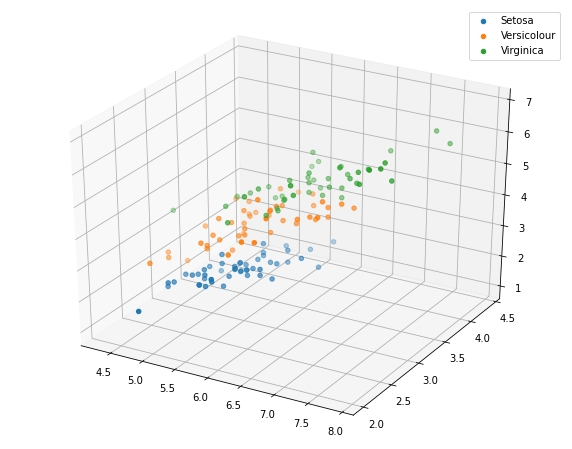

In [7]:
# 选取前三个特征绘制三维散点图
from mpl_toolkits.mplot3d import Axes3D

figure = plt.figure(figsize=(10,8))
ax = figure.add_subplot(111, projection='3d')
iris_all_class0 = iris_all[iris_all['target']==0].values
iris_all_class1 = iris_all[iris_all['target']==1].values
iris_all_class2 = iris_all[iris_all['target']==2].values
ax.scatter(iris_all_class0[:,0],iris_all_class0[:,1],iris_all_class0[:,2], label='Setosa')
ax.scatter(iris_all_class1[:,0],iris_all_class1[:,1],iris_all_class1[:,2], label='Versicolour')
ax.scatter(iris_all_class2[:,0],iris_all_class2[:,1],iris_all_class2[:,2], label='Virginica')
plt.legend() # 显示label
plt.show()

### Step5:利用 逻辑回归模型 在二分类上 进行训练和预测


In [8]:
#将数据划分为训练集和测试集，在训练集上进行训练，在测试集上查看训练的效果
from sklearn.model_selection import train_test_split
iris_features_part = iris_features.iloc[:100]
iris_target_part = iris_target[:100]
x_train, x_test, y_train, y_test = train_test_split(iris_features_part, iris_target_part,test_size=0.2, random_state=2020)

In [9]:
#从sklearn中导入逻辑回归模型
from sklearn.linear_model import LogisticRegression

In [10]:
## 定义逻辑回归模型
clf = LogisticRegression(random_state=0, solver='lbfgs')

In [11]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
## 在训练集上训练逻辑回归模型
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
## 查看逻辑回归的w
print('the weight of Logistic Regression:',clf.coef_)
##查看逻辑回归模型的w0
print('the intercept(w0) of Logistic regression:',clf.intercept_)

the weight of Logistic Regression: [[ 0.45181973 -0.81743611  2.14470304  0.89838607]]
the intercept(w0) of Logistic regression: [-6.53367714]


In [14]:
## 在训练集和测试集上分别利用训练好的模型进行测试
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

The accuracy of the Logistic Regression on training set: 1.0
The accuracy of the Logistic Regression on test set: 1.0
The confusion matrix result:
 [[ 9  0]
 [ 0 11]]


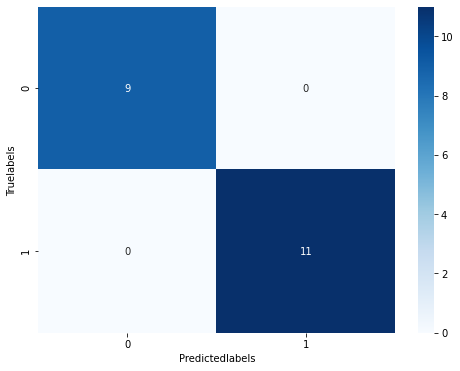

In [15]:
from sklearn import metrics
#计算准确度
print("The accuracy of the Logistic Regression on training set:",metrics.accuracy_score(train_predict,y_train))
print("The accuracy of the Logistic Regression on test set:",metrics.accuracy_score(test_predict,y_test))

## 查看混淆矩阵（预测值和真实值的各类情况统计矩阵）
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

## 利用热力图对预测结果进行展示
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predictedlabels')
plt.ylabel('Truelabels')
plt.show()

### Step6:利用 逻辑回归模型 在三分类(多分类)上 进行训练和预测

In [16]:
x_train,x_test,y_train,y_test = train_test_split(iris_features, iris_target,test_size=0.2,random_state=2020)

In [17]:
clf = LogisticRegression(random_state=0,solver='lbfgs')

In [18]:
clf.fit(x_train,y_train)

/home/crj/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
## 查看逻辑回归的w
print('the weight of Logistic Regression:\n',clf.coef_)
##查看逻辑回归模型的w0
print('the intercept(w0) of Logistic regression:\n',clf.intercept_)

the weight of Logistic Regression:
 [[-0.43476516  0.88611834 -2.18912786 -0.94014751]
 [-0.38565072 -2.66413298  0.75758301 -1.38261087]
 [-0.00811281  0.11312037  2.52971372  2.35084911]]
the intercept(w0) of Logistic regression:
 [  6.26404984   8.32611826 -16.63593196]


In [21]:
## 在训练集和测试集上进行预测
train_predict = clf.predict(x_train)
test_predict = clf.predict(x_test)

## 由于逻辑回归时概率预测模型 （p = p(y=1|x,\theta)）
train_predict_prob = clf.predict_proba(x_train)
test_predict_prob = clf.predict_proba(x_test)

# print(train_predict_prob)

## 计算准确率
print('The accuracy of Logistic Regression on training set:',metrics.accuracy_score(train_predict,y_train))
print('The accuracy of Logistic Regression on test set:',metrics.accuracy_score(test_predict,y_test))


The accuracy of Logistic Regression on training set: 0.9583333333333334
The accuracy of Logistic Regression on test set: 0.8


The confusion matrix result:
 [[10  0  0]
 [ 0  7  3]
 [ 0  3  7]]


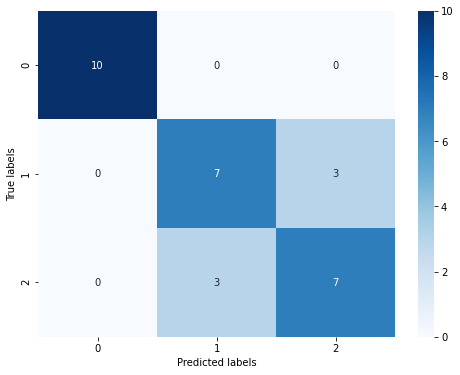

In [26]:
## 查看混淆矩阵
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n', confusion_matrix_result)

## 热力图显示
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix_result, annot=True,cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()